In [38]:
# Подключаю библиотеки


import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [90]:
# Загружаю данные 

data = pd.read_csv('gym.csv')

In [91]:
data.head(100)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,0,1,6,0,25,101.702604,5,0,0.669806,0.363487,1
96,1,1,1,0,1,6,0,30,179.123852,6,3,2.938673,2.878774,0
97,1,1,1,1,1,6,1,31,23.301837,6,6,1.040158,0.984882,0
98,1,1,0,0,1,1,0,26,125.386963,2,0,1.380921,0.270031,1


In [92]:
# В таблице 4000 записей и 14 столбцов (3 поля содержат данные типа float, остальные - int)
# признаки int и float, это ок. Если бы были, например, object, надо привести к int/float 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
# Проверяем на дубли

data.duplicated().value_counts()

False    4000
dtype: int64

In [18]:
# Смотрим, сколько пропусков в столбцах

data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [17]:
# Смотрим, есть ли «NaN» в каждом столбце
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Дублей, пропусков, NaN нет. Это хорошо

In [ ]:
# Переименовала первый столбец, чтобы все назывались с заглавной буквы, "для красоты"
data = data.rename(columns = {"gender":"Gender"})

In [293]:
data.head()

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0


In [7]:
# Вывожу базовые статистики
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,5.011500,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,3.899573,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,2.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,2.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,7.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,13.000000,31.000000,6.023668,6.146783,1.000000


In [105]:
count_gender_1 = len(data[data['Gender'] == 1])
count_gender_0 = len(data[data['Gender'] == 0])  
    
print ('Количество клиентов 1:', count_gender_1) 
print ('Количество клиентов 0:', count_gender_0) 

Количество клиентов 1: 2041
Количество клиентов 0: 1959


In [ ]:
# Так как по условию непонятно разделение клиентов по полу, после анализа видим, 
# что мужчин и женщин приблизительно поровну 50 на 50

([<matplotlib.axis.XTick at 0x7fbab982d130>,
 [Text(0, 0, ''), Text(0, 0, '')])

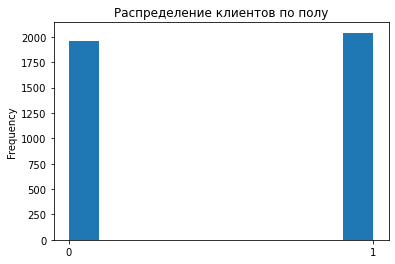

In [22]:
# Наглядно представим на диаграмме

data['Gender'].plot(kind = "hist", xlabel = 'Gender', title = 'Распределение клиентов по полу')
plt.xticks([0, 1])

In [24]:
# Подсчет уникальных значений в столбце Near_Location
len(data['Near_Location'].unique())

2

Два уникальных значения в поле 'Near_Location' 0 или 1 в зависиомсти от того проживает/работает клиент в районе, где находится фитнес 

In [148]:
count_location_1 = len(data[data['Near_Location'] == 1])
count_location_0 = len(data[data['Near_Location'] == 0])
    
    
print ('Количество клиентов проживающих 1:', count_location_1, '\nКоличество клиентов проживающих 0:', count_location_0)   

Количество клиентов проживающих 1: 3381 
Количество клиентов проживающих 0: 619


In [156]:
df = data[['Near_Location', 'Gender']].groupby(['Near_Location']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Near_Location,Count
0,0,619
1,1,3381


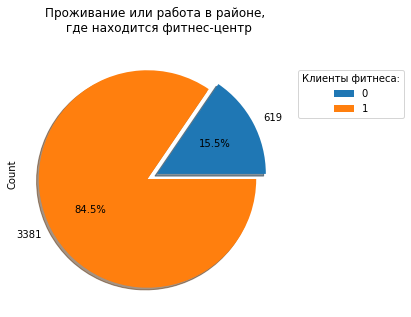

In [176]:
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['0','1'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Проживание или работа в районе, \n где находится фитнес-центр")
plt.show()

85% -это клиенты, которые живут или работают рядом с фитнесом

In [177]:
df = data[['Partner', 'Gender']].groupby(['Partner']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Partner,Count
0,0,2053
1,1,1947


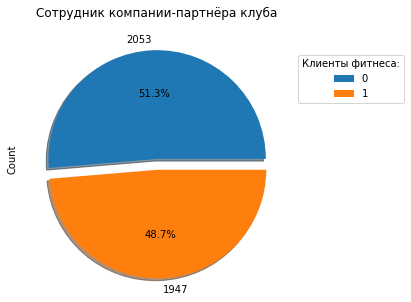

In [179]:
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['0','1'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Cотрудник компании-партнёра клуба")
plt.show()

Чуть меньше половины (49%) являются сотрудниками компаний-партнеров фитнес-клуба 

In [180]:
df = data[['Promo_friends', 'Gender']].groupby(['Promo_friends']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Promo_friends,Count
0,0,2766
1,1,1234


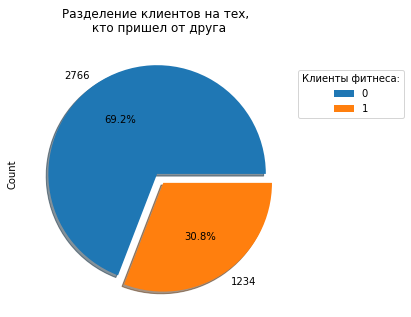

In [182]:
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['0','1'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Разделение клиентов на тех, \n кто пришел от друга")
plt.show()

31% клиентов первоначально пришел по акции "приведи друга"

([<matplotlib.axis.XTick at 0x7fbab39009d0>,
 [Text(0, 0, ''), Text(0, 0, '')])

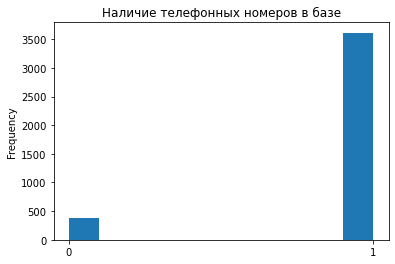

In [188]:
data['Phone'].plot(kind = "hist", xlabel = 'phone',  title = 'Наличие телефонных номеров в базе')
plt.xticks([0, 1])

У 90% клиентов известен номер телефона

In [207]:
# медиана длительности текущего абонемента
data['Contract_period'].median()

1.0

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Contract_period', ylabel='Density'>

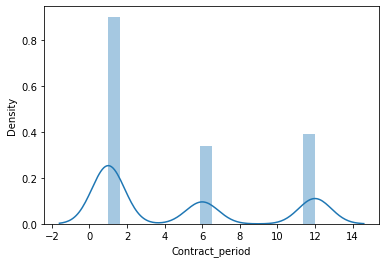

In [197]:
### Распределение длительности текущего абонемента
sns.distplot(data.Contract_period)

In [202]:
df = data[['Contract_period', 'Gender']].groupby(['Contract_period']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Contract_period,Count
0,1,2207
1,6,833
2,12,960


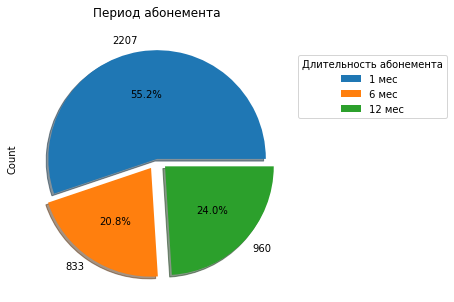

In [206]:
explode = (0, 0.1, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['1 мес','6 мес', '12 мес'], title = "Длительность абонемента", bbox_to_anchor=(1, 0.9))
plt.title("Период абонемента")
plt.show()

У 55% клиентов длительность действующего абонемента составляет 1 месяц, у 21% - 6 месяцев и у 24% - 12 месяцев 

In [210]:
df = data[['Group_visits', 'Gender']].groupby(['Group_visits']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Group_visits,Count
0,0,2351
1,1,1649


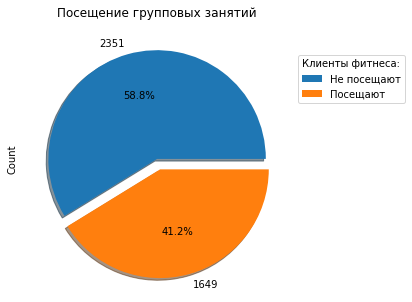

In [212]:
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['Не посещают','Посещают'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Посещение групповых занятий")
plt.show()

41% клиентов посещают групповые занятия

In [216]:
df = data[['Age', 'Gender']].groupby(['Age']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Age,Count
0,18,2
1,19,2
2,20,14
3,21,24
4,22,33
5,23,82
6,24,148
7,25,231
8,26,300
9,27,378


/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

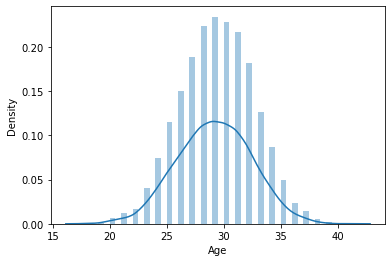

In [217]:
sns.distplot(data.Age)

Распределение клиентов по возрасту похоже на нормальное.
Значит среднее значение, медиана и мода будут приблизительно одинаковы.

In [218]:
# медиана длительности текущего абонемента
data['Age'].median()

29.0

In [219]:
#среднее арифметическое
data['Age'].mean()

29.18425

In [220]:
# мода
data['Age'].mode()

0    29
dtype: int64

In [280]:
df = data[['Churn', 'Gender']].groupby(['Churn']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Churn,Count
0,0,2939
1,1,1061


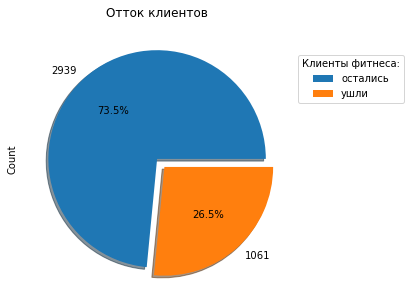

In [282]:
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['остались','ушли'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Отток клиентов")
plt.show()

Отток клиентов составил 27% 

In [275]:
# Первый датафрейм, где факт оттока = 0 (оставшиеся клиенты)


df1 = data[data['Churn'] == 0]

In [272]:
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2939 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2939 non-null   int64  
 1   Near_Location                      2939 non-null   int64  
 2   Partner                            2939 non-null   int64  
 3   Promo_friends                      2939 non-null   int64  
 4   Phone                              2939 non-null   int64  
 5   Contract_period                    2939 non-null   int64  
 6   Group_visits                       2939 non-null   int64  
 7   Age                                2939 non-null   int64  
 8   Avg_additional_charges_total       2939 non-null   float64
 9   Month_to_end_contract              2939 non-null   int64  
 10  Lifetime                           2939 non-null   int64  
 11  Avg_class_frequency_total          2939 non-null   float

In [283]:
df1.describe()

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.888397,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.080679,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,2.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,2.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,13.000000,31.000000,6.023668,6.146783,0.0


In [277]:
# датафрейм по клиентам, которые ушли 

df2 = data[data['Churn'] == 1]

In [278]:
df2.head()

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
7,0,1,0,0,1,1,0,30,217.786641,2,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,2,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,2,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,2,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,2,1,1.420637,1.043101,1


In [284]:
df2.describe()

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,2.582469,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.782524,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,2.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,2.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,2.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,2.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,13.000000,9.000000,3.478646,3.540271,1.0


In [291]:
# 23% клиентов из оттока живут / работают в другом районе

location_churn = (len(df2[df2['Near_Location']==0]) / df2['Near_Location'].count() ) *100
location_churn

23.185673892554195

([<matplotlib.axis.XTick at 0x7fba9a997ee0>,
 [Text(0, 0, ''), Text(0, 0, '')])

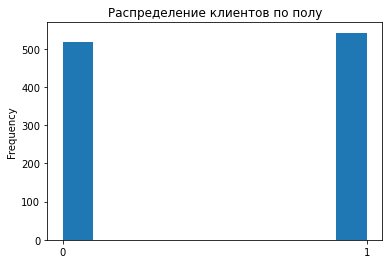

In [292]:
df2['Gender'].plot(kind = "hist", xlabel = 'Gender', title = 'Распределение клиентов по полу')
plt.xticks([0, 1])

50% мужчин и 50% женщин в оттоке